In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_ratings = pd.read_csv(r'C:\Projects\Recomender System\data\raw\ratings.csv')
df_movies = pd.read_csv(r'C:\Projects\Recomender System\data\raw\movies.csv')

df_ratings.head(), df_movies.head()

(   userId  movieId  rating   timestamp
 0       1      296     5.0  1147880044
 1       1      306     3.5  1147868817
 2       1      307     5.0  1147868828
 3       1      665     5.0  1147878820
 4       1      899     3.5  1147868510,
    movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II (1995)   
 
                                         genres  
 0  Adventure|Animation|Children|Comedy|Fantasy  
 1                   Adventure|Children|Fantasy  
 2                               Comedy|Romance  
 3                         Comedy|Drama|Romance  
 4                                       Comedy  )

In [4]:
df_ratings.info()
df_ratings['rating'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [5]:
n_users = df_ratings['userId'].nunique()
n_movies = df_movies['movieId'].nunique()
n_ratings = len(df_ratings)

n_users, n_movies, n_ratings

(162541, 62423, 25000095)

In [6]:
sparsity = 1 - (n_ratings / (n_users*n_movies))
print(f"Sparsity: {sparsity:.4f} ({sparsity*100:.2f}%)")

Sparsity: 0.9975 (99.75%)


In [7]:
ratings_per_user = df_ratings.groupby("userId")["rating"].count()
ratings_per_user.describe()

count    162541.000000
mean        153.807932
std         268.047590
min          20.000000
25%          36.000000
50%          71.000000
75%         162.000000
max       32202.000000
Name: rating, dtype: float64

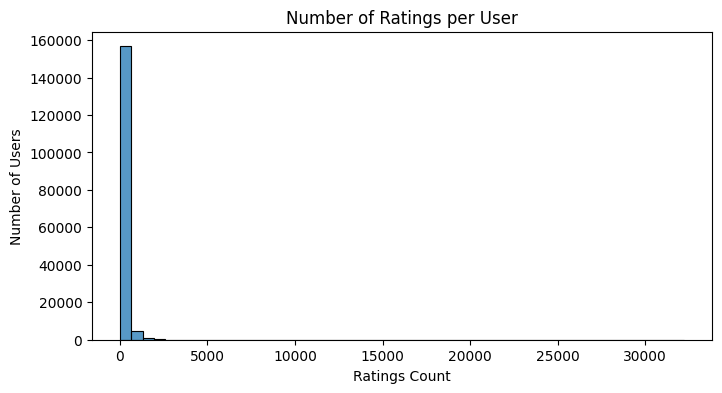

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(ratings_per_user, bins=50)
plt.title("Number of Ratings per User")
plt.ylabel("Number of Users")
plt.xlabel("Ratings Count")
plt.show()

In [17]:
ratings_per_movie = df_ratings.groupby("movieId")["rating"].count()
ratings_per_movie.describe()

count    59047.000000
mean       423.393144
std       2477.885821
min          1.000000
25%          2.000000
50%          6.000000
75%         36.000000
max      81491.000000
Name: rating, dtype: float64

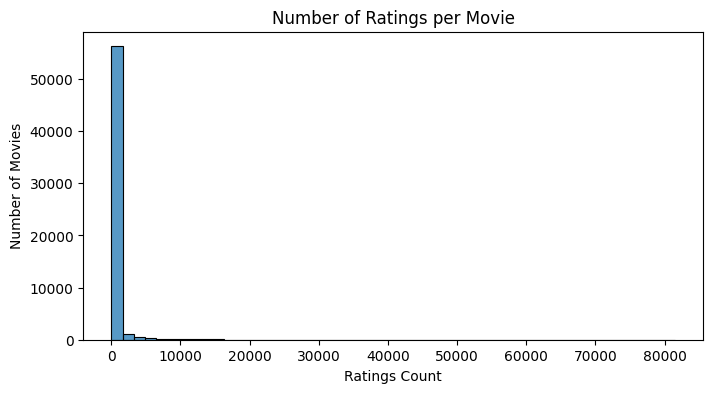

In [18]:
plt.figure(figsize=(8,4))
sns.histplot(ratings_per_movie, bins=50)
plt.title("Number of Ratings per Movie")
plt.ylabel("Number of Movies")
plt.xlabel("Ratings Count")
plt.show()

In [19]:
min_user_ratings = 5
min_movie_ratings = 5

active_users = ratings_per_user[ratings_per_user >= min_user_ratings].index
df_filtered = df_ratings[df_ratings['userId'].isin(active_users)]

ratings_per_movie_filtered = df_filtered.groupby('movieId')['rating'].count()
popular_movies = ratings_per_movie_filtered[ratings_per_movie_filtered >= min_movie_ratings].index

df_filtered = df_filtered[df_filtered['movieId'].isin(popular_movies)]

df_filtered.shape, df_ratings.shape

((24945870, 4), (25000095, 4))

In [20]:
df_cf = df_filtered[['userId', 'movieId', 'rating']]
df_cf.to_parquet(r'C:\Projects\Recomender System\data\processed\ratings_for_cf.parquet', index=False)